# Development Environment: Evaluating Model Performance

Area 1: Initial functional tests

## Area 1: Initial Functional Tests

Evaluating model basic functionality and results to see where logical improvements need to be made and mistakes were created. 

In [56]:
import os
import pandas as pd
import libsbml as sb
import matplotlib.pyplot as plt

In [57]:
# retrieve SBML files
stochMod = sb.readSBMLFromFile('../tests/Stochastic.sbml').getModel()
detMod = sb.readSBMLFromFile('../tests/Deterministic.sbml').getModel()



# Get species names
singlecell_species = []

for i in range(stochMod.getNumSpecies()):
    singlecell_species.append(stochMod.getSpecies(i).getId())

for i in range(detMod.getNumSpecies()):
    singlecell_species.append(detMod.getSpecies(i).getId())

singlecell_species

['nuc_gene_a__LIGAND_',
 'nuc_gene_i__LIGAND_',
 'nuc_gene_a__RECEPTOR_',
 'nuc_gene_i__RECEPTOR_',
 'cyt_mrna__LIGAND_',
 'cyt_mrna__RECEPTOR_',
 'cyt_prot__LIGAND_',
 'cyt_prot__RECEPTOR_',
 'cyt_prot__LIGAND__RECEPTOR_']

In [58]:
# Model Results  
data = pd.read_csv('../src/results.tsv', sep = '\t', header=None, names=singlecell_species, index_col = False)

In [59]:
data

,nuc_gene_a__LIGAND_,nuc_gene_i__LIGAND_,nuc_gene_a__RECEPTOR_,nuc_gene_i__RECEPTOR_,cyt_mrna__LIGAND_,cyt_mrna__RECEPTOR_,cyt_prot__LIGAND_,cyt_prot__RECEPTOR_,cyt_prot__LIGAND__RECEPTOR_
0,1,1,0,2,0,3,2.000000e+01,100.0000,0.000000e+00
1,1,1,0,2,0,3,7.792530e+00,89.9816,1.207920e+01
2,1,1,0,2,0,3,1.470320e+00,87.9723,1.832700e+01
3,1,1,0,2,0,3,2.906410e-01,93.1024,1.948730e+01
4,1,1,0,2,0,3,1.970070e-01,101.1330,1.957200e+01
...,...,...,...,...,...,...,...,...,...
2876,0,2,0,2,0,2,1.800710e-60,300.0000,5.420060e-58
2877,0,2,0,2,0,2,1.641010e-60,300.0000,4.939400e-58
2878,0,2,0,2,0,2,1.495440e-60,300.0000,4.501220e-58
2879,0,2,0,2,0,2,1.362730e-60,300.0000,4.101790e-58


### LR-Data Evaluation:

the following is specifically for evaluating functionality of the Ligand-Receptor Model in SingleCell/tests

/tmp/ipykernel_30953/4159145603.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


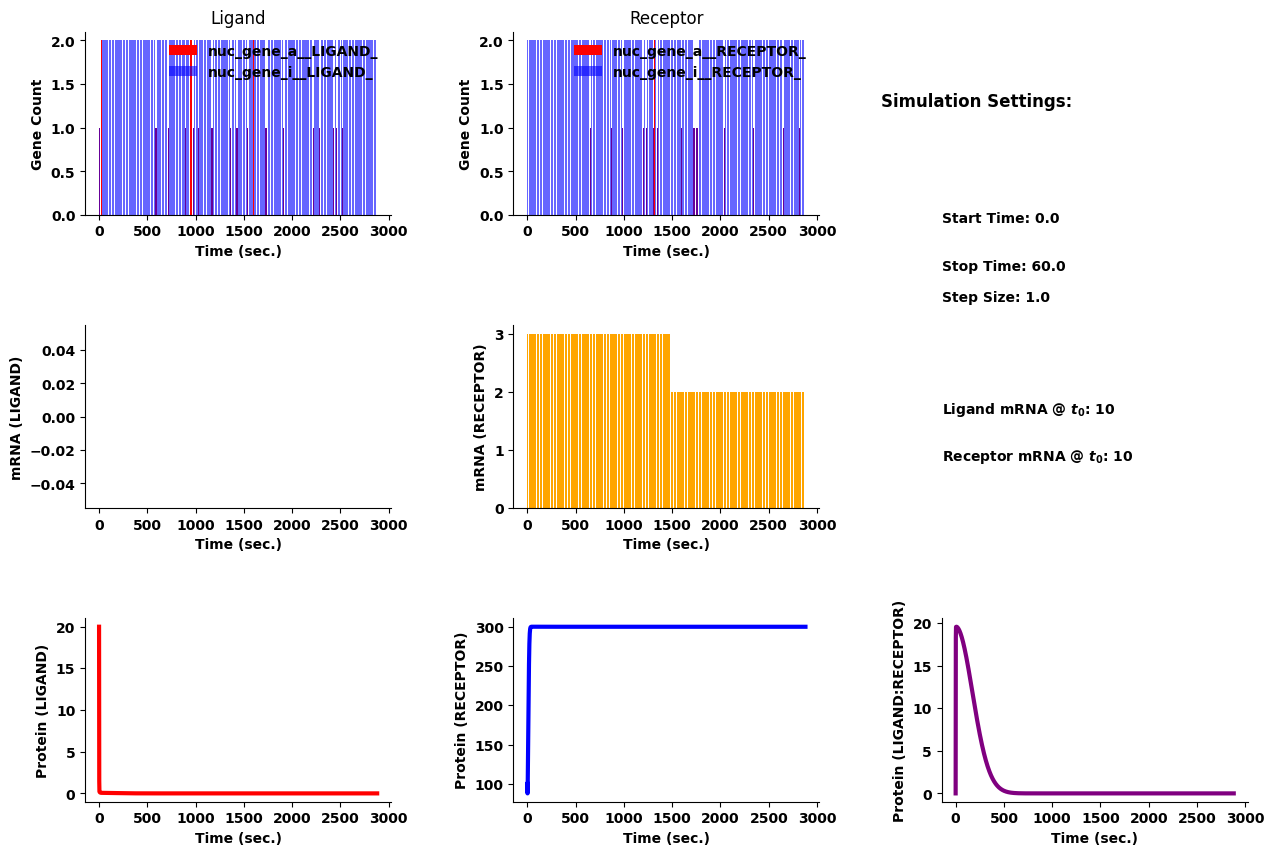

In [60]:
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib as mpl
headers = [
    'nuc_gene_a__LIGAND_',
    'nuc_gene_i__LIGAND_',
    'nuc_gene_a__RECEPTOR_',
    'nuc_gene_i__RECEPTOR_',
    'cyt_mrna__LIGAND_',
    'cyt_mrna__RECEPTOR_',
    'cyt_prot__LIGAND_',
    'cyt_prot__RECEPTOR_',
    'cyt_prot__LIGAND__RECEPTOR_'
]

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(3, 3, figure=fig, hspace=0.6, wspace=0.4)

# mpl.rcParams['font.size'] = 16
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['lines.linewidth'] = 3

# Experiment length
import numpy as np 
time = np.arange(0.0, 86400.0, 30.0)

# === Top row (Bar plots comparing pairs) ===
ax1_0 = fig.add_subplot(gs[0, 0])
ax1_0.bar(data.index, data[headers[0]], color='red', label=headers[0])
ax1_0.bar(data.index, data[headers[1]], color='blue', alpha=0.6, label=headers[1])
ax1_0.set_title("Ligand")
ax1_0.set_ylabel("Gene Count")
ax1_0.set_xlabel('Time (sec.)')
ax1_0.legend(frameon = False)

ax1_1 = fig.add_subplot(gs[0, 1])
ax1_1.bar(data.index, data[headers[2]], color='red', label=headers[2])
ax1_1.bar(data.index, data[headers[3]], color='blue', alpha=0.6, label=headers[3])
ax1_1.set_title("Receptor")
ax1_1.set_ylabel("Gene Count")
ax1_1.set_xlabel('Time (sec.)')
ax1_1.legend(frameon = False, )

# === Middle row (Single bar plots) ===
ax2_0 = fig.add_subplot(gs[1, 0])
ax2_0.bar(data.index, data[headers[4]], color='green')
ax2_0.set_ylabel("mRNA (LIGAND)")
ax2_0.set_xlabel('Time (sec.)')

ax2_1 = fig.add_subplot(gs[1, 1])
ax2_1.bar(data.index, data[headers[5]], color='orange')
ax2_1.set_ylabel("mRNA (RECEPTOR)")
ax2_1.set_xlabel('Time (sec.)')

# === Bottom row (Line plots) ===
ax3_0 = fig.add_subplot(gs[2, 0])  # Span full row
ax3_1 = fig.add_subplot(gs[2, 1])
ax3_2 = fig.add_subplot(gs[2, 2])
ax3_0.plot(data.index, data[headers[6]], color='red', label=headers[6])
ax3_0.set_ylabel("Protein (LIGAND)")
ax3_0.set_xlabel('Time (sec.)')
ax3_1.plot(data.index, data[headers[7]], color='blue', label=headers[7])
ax3_1.set_ylabel("Protein (RECEPTOR)")
ax3_1.set_xlabel('Time (sec.)')
ax3_2.plot(data.index, data[headers[8]], color='purple', label=headers[8])
ax3_2.set_ylabel("Protein (LIGAND:RECEPTOR)")
ax3_2.set_xlabel('Time (sec.)')

ax1_2 = fig.add_subplot(gs[0:2, 2])

ax1_2.text(-0.2,0.8, "Simulation Settings: \n", fontsize = 12)
ax1_2.text(0.0, 0.6, "Start Time: 0.0", fontsize = 10)
ax1_2.text(0.0, 0.5,"Stop Time: 60.0", fontsize = 10)
ax1_2.text(0.0, 0.4,"Step Size: 1.0\n", fontsize = 10)

ax1_2.text(0.0, 0.2,r"Ligand mRNA @ $t_{0}$: 10", fontsize = 10)
ax1_2.text(0.0, 0.1,r"Receptor mRNA @ $t_{0}$: 10", fontsize = 10)
ax1_2.axis('off')
# fig.add_subplot(gs[1, 2]).axis('off')

sns.despine(fig)

# Final touches
# fig.suptitle("Gene Expression and Interaction Overview", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
